In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [41]:
X,y = make_blobs(n_samples=100,n_features=2,centers=2,random_state=42)


In [23]:
XOR = np.array([[1,1],
              [1,0],
              [0,1],
              [0,0]])
yor = np.array([0,1,1,0])
yor = yor.reshape((yor.shape[0],1))

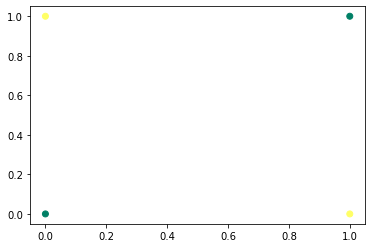

In [25]:
plt.scatter(XOR[:,0],XOR[:,1], c=yor,cmap='summer')

In [42]:
y = y.reshape((y.shape[0],1))

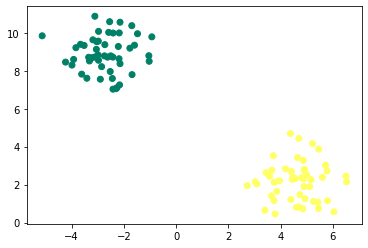

In [43]:
plt.scatter(X[:,0],X[:,1], c=y,cmap='summer')

In [14]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

In [7]:
def model(X,W,b):
    Z = X.dot(W)+b
    A = 1/(1+np.exp(-Z))
    return A

In [16]:
 def log_loss(A,y):
        return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

In [9]:
def gradient(A,x,y):
    dw = 1/len(y)*np.dot(x.T,A-y)
    db = 1/len(y)*np.sum(A-y)
    return (dw,db)

In [10]:
def update(dw,db,w,b,learning_rate):
    w = w -learning_rate*dw
    b = b-learning_rate*db
    return (w,b)

In [46]:
def perceptron_simple(X,y,learning_rate=0.1,n_iter=100):
    W,b = initialisation(X)
    Loss = list()
    for i in range(n_iter):
        A = model(X,W,b)
        Loss.append(log_loss(A,y))
        dw,db = gradient(A,X,y)
        W,b = update(dw,db,W,b,learning_rate)
    plt.plot(Loss)
    plt.show()
    return (W,b,Loss)

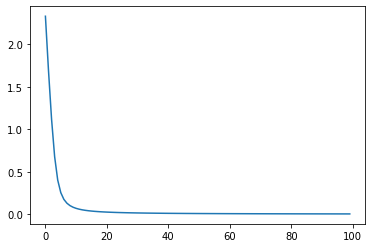

In [47]:
W,b,Loss = perceptron_simple(X,y)

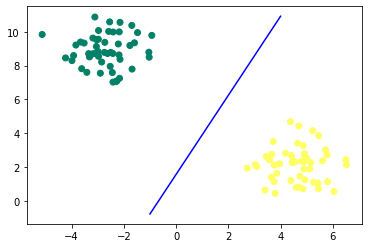

In [48]:
x0 = np.linspace(-1,4,100)
plt.scatter(X[:,0],X[:,1], c=y,cmap='summer')
x1 = (-W[0] * x0 - b)/W[1]
plt.plot(x0,x1,c='b')
plt.show()

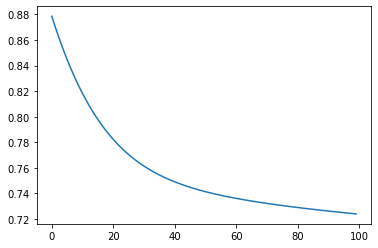

======================activation===================
[[-0.78557581]
 [-0.58413465]]
======================biais===================
[0.78621948]


In [31]:
W,b = perceptron_simple(XOR,yor)
print("======================activation===================")
print(W)
print("======================biais===================")
print(b)

In [32]:
def predict(X,W,b):
    A = model(X,W,b)
    return A

In [36]:
predict(np.array([[0,0]]),W,b)*100

array([[68.70190038]])